MNE-Python is an open-source Python package specifically designed for the analysis of electrophysiological data—primarily EEG (electroencephalography) and MEG (magnetoencephalography).

In [1]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 100.5 MB/s eta 0:00:00


* **`import pandas as pd`**
  Loads pandas, a library for data tables (DataFrames), to read and manipulate EEG metadata and PSD values.

* **`import numpy as np`**
  Loads NumPy, used for fast numerical arrays and vectorized operations on EEG feature data.

* **`import matplotlib.pyplot as plt`**
  Loads Matplotlib’s plotting interface, used to create figures and display EEG topomaps, histograms, and other charts.

* **`import mne`**
  Loads MNE-Python, a toolbox for EEG/MEG processing; here it provides `plot_topomap` to visualize scalp distributions of band power.

* **`from math import ceil`**
  Imports the `ceil` function to round up when calculating the number of subplot rows or columns needed.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from math import ceil

Importing dataset

In [3]:
df=pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')

In [4]:
df

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,942,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446



The DataFrame df now holds all 945 subjects (rows) and their associated features (columns). Specifically:



Rows (945): Each row is one subject



Columns (~1,149):



The first few columns are metadata (e.g., no., sex, age, eeg.date, education, IQ, main.disorder, specific.disorder).



After a completely empty separator column, the remaining ~1,140 columns are absolute PSD power values for each combination of six frequency bands (delta, theta, alpha, beta, high-beta, gamma) × 19 electrode sites (e.g., delta.FP1, gamma.O2, etc.).

In [5]:
# One of the columns contains no data, it separates data
# patient info | abs power of PSD per band per channel | sep_col | functional connectivity data
mis = df.isna().sum()
sep_col = mis[mis == df.shape[0]].index[0]
df = df.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)
df

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,...,1.966436,1.763397,1.285942,2.437923,2.130979,1.727413,1.710518,2.574734,2.533354,5.596057
941,Healthy control,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,...,2.701922,2.685138,2.648595,2.559590,3.054965,3.163359,3.247100,2.646515,3.385173,3.085049
942,Healthy control,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,...,3.258838,2.434620,1.501337,0.840513,1.733498,1.610465,1.644675,1.216763,1.614421,1.164097
943,Healthy control,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,...,1.849005,1.678465,3.655796,1.429330,3.151128,1.630643,1.888551,1.447402,1.819110,1.302056


* **`mis = df.isna().sum()`**
  Counts how many missing (NaN) values each column has.

* **`sep_col = mis[mis == df.shape[0]].index[0]`**
  Finds the column where every entry is NaN (i.e., the empty “separator” column).

* **`df = df.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)`**
  Keeps all columns from `main.disorder` up to (but not including) the separator. In other words, it retains only the patient labels and the PSD power columns, then drops the all-NaN column itself.

In [7]:
def reformat_name(name):
    '''
    reformat from XX.X.band.x.channel to band.channel
    '''
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'
reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df.columns[:2],
                              reformat_vect(df.columns[2:])))
# Suppose `new_colnames` is a list/array of the same length as df.columns
# (e.g., from your `reformat_vect(df.columns[2:])` plus the first two originals).

# Method 1 (recommended): assign directly to df.columns
df.columns = new_colnames

# Method 2: use set_axis without inplace, then re‐assign
df = df.set_axis(new_colnames, axis=1)

* **`def reformat_name(name):`**

  * Takes a column name in the form `XX.X.band.x.channel` (e.g., `AB.A.delta.a.FP1`).
  * `name[5:]` skips the initial prefix (`“AB.A.”`), leaving `“delta.a.FP1”`.
  * Splits on `'.'` into three parts: `band` (e.g., `delta`), a throwaway `_` (e.g., `a`), and `channel` (e.g., `FP1`).
  * Returns the new string `f'{band}.{channel}'` (e.g., `delta.FP1`).

* **`reformat_vect = np.vectorize(reformat_name)`**
  Creates a vectorized version of your function so it can be applied to an entire NumPy array of column names at once.

* **`new_colnames = np.concatenate((df.columns[:2], reformat_vect(df.columns[2:])))`**

  * Keeps the first two original columns (e.g., `main.disorder`, `specific.disorder`) unchanged.
  * Applies `reformat_name` to every PSD column (from the third onward), producing names like `delta.FP1`, `theta.F3`, etc.
  * Concatenates them into a single array of new column labels.

* **`df.columns = new_colnames`**
  Renames all columns in the DataFrame to these concise `band.channel` labels.

* **Why this matters for EEG:**

  * Original names (e.g., `AB.A.delta.a.FP1`) are verbose and make it hard to group by band or channel.
  * `delta.FP1` is human-readable and clearly indicates “delta band power at electrode FP1.”
  * Simplifying labels helps when you later want to select all “delta.\*” features or pivot by band/channel for plotting.

In [8]:
# mean powers per main disorder
main_mean = df.groupby('main.disorder').mean(numeric_only=True).reset_index()
spec_mean = df.groupby('specific.disorder').mean(numeric_only=True).reset_index()
# list of bands
bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
# convert from wide to long
main_mean = pd.wide_to_long(main_mean, bands, ['main.disorder'], 'channel', sep='.', suffix='\w+')
spec_mean = pd.wide_to_long(spec_mean, bands, ['specific.disorder'], 'channel', sep='.', suffix='\w+')
main_mean

,,delta,theta,alpha,beta,highbeta,gamma
main.disorder,channel,,,,,,
Addictive disorder,FP1,18.831516,13.836983,24.308169,10.588020,2.041568,2.418517
Anxiety disorder,FP1,20.212546,12.220164,20.542989,11.369194,2.362892,2.874982
Healthy control,FP1,18.383673,11.877841,21.024037,9.197048,2.055055,2.577345
Mood disorder,FP1,20.652163,13.594064,23.575915,12.357410,2.629678,3.292514
Obsessive compulsive disorder,FP1,18.261254,12.469764,24.380553,9.946188,2.199657,3.096013
...,...,...,...,...,...,...,...
Healthy control,O2,9.597102,7.218941,20.192476,10.277784,1.955759,2.990976
Mood disorder,O2,13.887099,9.051129,28.289462,13.643925,2.554539,3.615276
Obsessive compulsive disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698




main_mean = df.groupby('main.disorder').mean(numeric_only=True).reset_index()
Groups subjects by general diagnosis (main.disorder) and computes the average EEG power for each band × channel across those subjects.

spec_mean = df.groupby('specific.disorder').mean(numeric_only=True).reset_index()
Similar to above, but groups by more detailed sub-disorder labels (specific.disorder).

bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
Defines the six EEG frequency bands of interest. Each one spans all 19 channels (e.g., delta.FP1, alpha.Cz).

pd.wide_to_long(...)
Reshapes the DataFrame from wide format (columns = band.channel) to long format:

Each row becomes a single measurement: disorder, channel, band, power.

Makes it easier to slice and plot by band or electrode.




---

Significance in EEG Context

EEG power varies by disorder, frequency band, and channel location.

This grouping and reshaping allows you to:

Analyze which bands (e.g., delta, gamma) are elevated or suppressed in each disorder.

Plot topographic maps per band/disorder to see scalp-wide changes.


Example: Schizophrenia might show increased gamma power in frontal regions compared to healthy controls. This format lets you extract and visualize that easily.

In [9]:
main_mean.loc['Schizophrenia', 'gamma']

,gamma
channel,
FP1,3.681332
FP2,3.840776
F7,3.586139
F3,3.380585
Fz,3.279946
F4,3.411508
F8,3.784580
T3,4.228335
C3,3.165926


This output shows the average gamma band power at each EEG channel for subjects with Schizophrenia.


---

🔍 Explanation

main_mean.loc['Schizophrenia', 'gamma']
Retrieves the row of gamma-band powers for each electrode (channel) averaged over all schizophrenia subjects.



---

🧠 Significance in EEG Context

The gamma band (30–100 Hz) is associated with high-level cognitive functions like attention, perception, and memory integration.

Abnormal gamma activity has been linked to schizophrenia, particularly reflecting dysregulated cortical excitation/inhibition balance.



---

 Example Interpretations:

Higher gamma at T3 (4.23), O1 (4.26), O2 (3.87) may indicate abnormal activity in temporal and occipital regions.

Lower gamma at central (Cz: 3.08) and parietal (Pz: 2.80) might suggest reduced integration in those areas.


You can now plot this with a topomap to visualize where gamma power is elevated or suppressed across the scalp for schizophrenia.

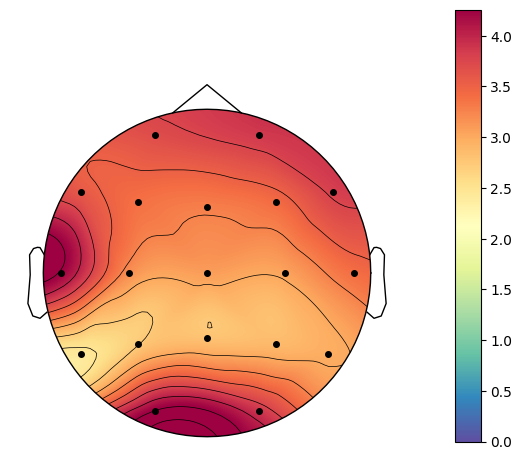

In [11]:


#
#
chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()


def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vlim=None, **kwargs):
    """
    Function visulises processed EEG data in a simple way. Based on mne.viz.plot_topomap.


    :param levels: numpy.array, shape (n_chan,)
        data values to plot.
    :param positions: numpy.array, shape (n_chan, 2)|instance of mne.Info
        Location information for the data points(/channels). If an array, for each data point,
        the x and y coordinates. If an Info object, it must contain only one data type and exactly
        len(data) data channels, and the x/y coordinates will be inferred from the montage applied
        to the Info object.
    :param axes: matplotlib.axes.Axes
        The axes to plot to.
    :param fig: matplotlib.figure.Figure
        The figure to create colorbar on.
    :param ch_names: list | None
        List of channel names. If None, channel names are not plotted.
    :param cmap: matplotlib colormap | None
        Colormap to use. If None, ‘Reds’ is used for all positive data, otherwise defaults to ‘RdBu_r’.
        Default value is 'Spectral_r'
    :param cb_pos: tuple/list of floats
        Coordinates of color bar
    :param cb_width: float
        Width of colorbar
    :param cb_height: float
        Height of colorbar
    :param marker: numpy.array of bool, shape (n_channels,) | None
        Array indicating channel(s) to highlight with a distinct plotting style.
        Array elements set to True will be plotted with the parameters given in mask_params.
        Defaults to None, equivalent to an array of all False elements.
    :param marker_style: dict | None
        Additional plotting parameters for plotting significant sensors. Default (None) equals:
        dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=4)
    :param vlim: tuple of length 2 | 'joint' | None
        Lower and upper bounds of the colormap, typically a numeric value in the same units as the data.
        Elements of the tuple may also be callable functions which take in a NumPy array and return a scalar.
    :param kwargs:
        any other parameter used in mne.viz.plot_topomap
    :return im: matplotlib.image.AxesImage
        The interpolated data.
    :return cn: matplotlib.contour.ContourSet
        The fieldlines.
    """
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None

    # Pass vlim directly to mne.viz.plot_topomap
    # Removed mask_style and border_width as they are not valid arguments for mne.viz.plot_topomap
    im, cm = mne.viz.plot_topomap(
        levels, positions, axes=axes, sensors=True, names=ch_names, mask=mask, mask_params=marker_style,
        cmap=cmap, outlines='head', contours=10, image_interp='cubic', show=False, # Changed image_interp to 'cubic'
        sphere=None, res=64, extrapolate='head', # Removed names_size=None
        border='mean',
        ch_type=None,
        vlim=vlim, # Pass the vlim argument received by plot_eeg
        **kwargs
    )

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

# extract power for one main.disorder and one band
test =  main_mean.loc['Schizophrenia', 'gamma']
# make sure that channels are in correct order
assert (test.index == channels.index).all()
# plot
fig, ax = plt.subplots()
# Call plot_eeg with the vlim argument as intended by mne.viz.plot_topomap
# vlim should be a tuple (lower, upper) or 'joint'. Passing 0 as a single number might not be
# what's intended. Assuming you wanted the lower bound to be 0.
plot_eeg(test, channels.to_numpy(), ax, fig, vlim=(0, None), marker_style={'markersize':4, 'markerfacecolor':'black'})
plt.show()



---

✅ EEG Channel Coordinates

chs = {'FP1': [-0.03, 0.08], ..., 'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()

Explanation:
Defines standard 2D scalp coordinates (based on the 10–20 system) for 19 EEG electrodes. These positions are required to create accurate topographic (head) maps.


---

✅ Topomap Plotting Function

def plot_eeg(...):
    ...

Explanation:
This function wraps mne.viz.plot_topomap to visualize EEG band power on a scalp map:

levels: EEG power values (e.g., gamma) per channel

positions: 2D locations of electrodes

vlim: Sets min/max color scale range

Returns: Scalp plot + colorbar for interpretation


Used to compare spatial patterns of brain activity across disorders or bands.


---

✅ Plot Gamma Power for Schizophrenia

test = main_mean.loc['Schizophrenia', 'gamma']
assert (test.index == channels.index).all()
fig, ax = plt.subplots()
plot_eeg(test, channels.to_numpy(), ax, fig, vlim=(0, None), marker_style={'markersize':4, 'markerfacecolor':'black'})
plt.show()

Explanation:

Retrieves average gamma band power for each electrode in schizophrenia subjects

Ensures the data order matches the channel coordinate order

Plots a topomap, showing gamma power distribution across the scalp


Significance:
Abnormal gamma activity (especially in temporal or occipital areas) may reflect cognitive disruption in schizophrenia. This map helps visually localize such effects.

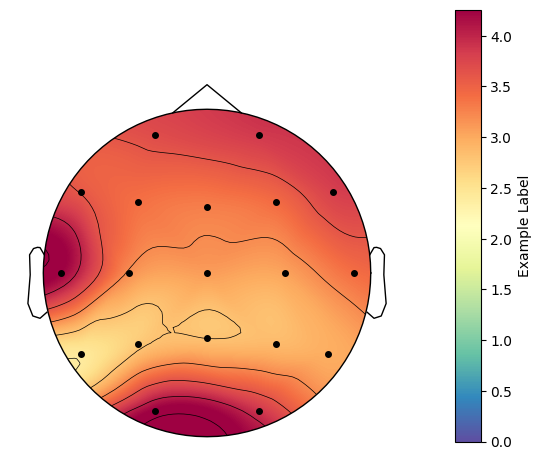

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from math import ceil

# Ensure the required library is installed


df=pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')

# One of the columns contains no data, it separates data
# patient info | abs power of PSD per band per channel | sep_col | functional connectivity data
mis = df.isna().sum()
sep_col = mis[mis == df.shape[0]].index[0]
df = df.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)

def reformat_name(name):
    '''
    reformat from XX.X.band.x.channel to band.channel
    '''
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'
reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df.columns[:2],
                              reformat_vect(df.columns[2:])))
# Suppose `new_colnames` is a list/array of the same length as df.columns
# (e.g., from your `reformat_vect(df.columns[2:])` plus the first two originals).

# Method 1 (recommended): assign directly to df.columns
df.columns = new_colnames

# Method 2: use set_axis without inplace, then re‐assign
df = df.set_axis(new_colnames, axis=1)

# mean powers per main disorder
main_mean = df.groupby('main.disorder').mean(numeric_only=True).reset_index()
spec_mean = df.groupby('specific.disorder').mean(numeric_only=True).reset_index()
# list of bands
bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
# convert from wide to long
main_mean = pd.wide_to_long(main_mean, bands, ['main.disorder'], 'channel', sep='.', suffix='\w+')
spec_mean = pd.wide_to_long(spec_mean, bands, ['specific.disorder'], 'channel', sep='.', suffix='\w+')


chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()


def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vlim=None, cbar_label=None, **kwargs):
    """
    Function visulises processed EEG data in a simple way. Based on mne.viz.plot_topomap.


    :param levels: numpy.array, shape (n_chan,)
        data values to plot.
    :param positions: numpy.array, shape (n_chan, 2)|instance of mne.Info
        Location information for the data points(/channels). If an array, for each data point,
        the x and y coordinates. If an Info object, it must contain only one data type and exactly
        len(data) data channels, and the x/y coordinates will be inferred from the montage applied
        to the Info object.
    :param axes: matplotlib.axes.Axes
        The axes to plot to.
    :param fig: matplotlib.figure.Figure
        The figure to create colorbar on.
    :param ch_names: list | None
        List of channel names. If None, channel names are not plotted.
    :param cmap: matplotlib colormap | None
        Colormap to use. If None, ‘Reds’ is used for all positive data, otherwise defaults to ‘RdBu_r’.
        Default value is 'Spectral_r'
    :param cb_pos: tuple/list of floats
        Coordinates of color bar
    :param cb_width: float
        Width of colorbar
    :param cb_height: float
        Height of colorbar
    :param marker: numpy.array of bool, shape (n_channels,) | None
        Array indicating channel(s) to highlight with a distinct plotting style.
        Array elements set to True will be plotted with the parameters given in mask_params.
        Defaults to None, equivalent to an array of all False elements.
    :param marker_style: dict | None
        Additional plotting parameters for plotting significant sensors. Default (None) equals:
        dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=4)
    :param vlim: tuple of length 2 | 'joint' | None
        Lower and upper bounds of the colormap, typically a numeric value in the same units as the data.
        Elements of the tuple may also be callable functions which take in a NumPy array and return a scalar.
    :param cbar_label: str | None
        Label for the colorbar.
    :param kwargs:
        any other parameter used in mne.viz.plot_topomap
    :return im: matplotlib.image.AxesImage
        The interpolated data.
    :return cn: matplotlib.contour.ContourSet
        The fieldlines.
    """
    # Ensure 'cbar_label' is not passed to plot_topomap
    # Check kwargs for 'cbar_label' and remove it if present, but it's cleaner to
    # define cbar_label as an explicit argument in the function signature.

    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None


    im, cm = mne.viz.plot_topomap(
        levels, positions, axes=axes, sensors=True, names=ch_names, mask=mask, mask_params=marker_style,
        cmap=cmap, outlines='head', contours=5, image_interp='cubic', show=False,
        sphere=None, res=64, extrapolate='head',
        border='mean',
        ch_type=None,
        vlim=vlim,
        **kwargs # Pass remaining kwargs
    )

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    # Add the label when creating the colorbar
    clb = fig.colorbar(im, cax=cbar_ax, label=cbar_label)
    return im, cm

# extract power for one main.disorder and one band
test =  main_mean.loc['Schizophrenia', 'gamma']
# make sure that channels are in correct order
assert (test.index == channels.index).all()
# plot
fig, ax = plt.subplots()
# Call plot_eeg with the vlim argument as intended by mne.viz.plot_topomap
# vlim should be a tuple (lower, upper) or 'joint'. Passing 0 as a single number might not be
# what's intended. Assuming you wanted the lower bound to be 0.
plot_eeg(test, channels.to_numpy(), ax, fig, vlim=(0, None), marker_style={'markersize':4, 'markerfacecolor':'black'}, cbar_label='Example Label') # Added cbar_label here
plt.show()

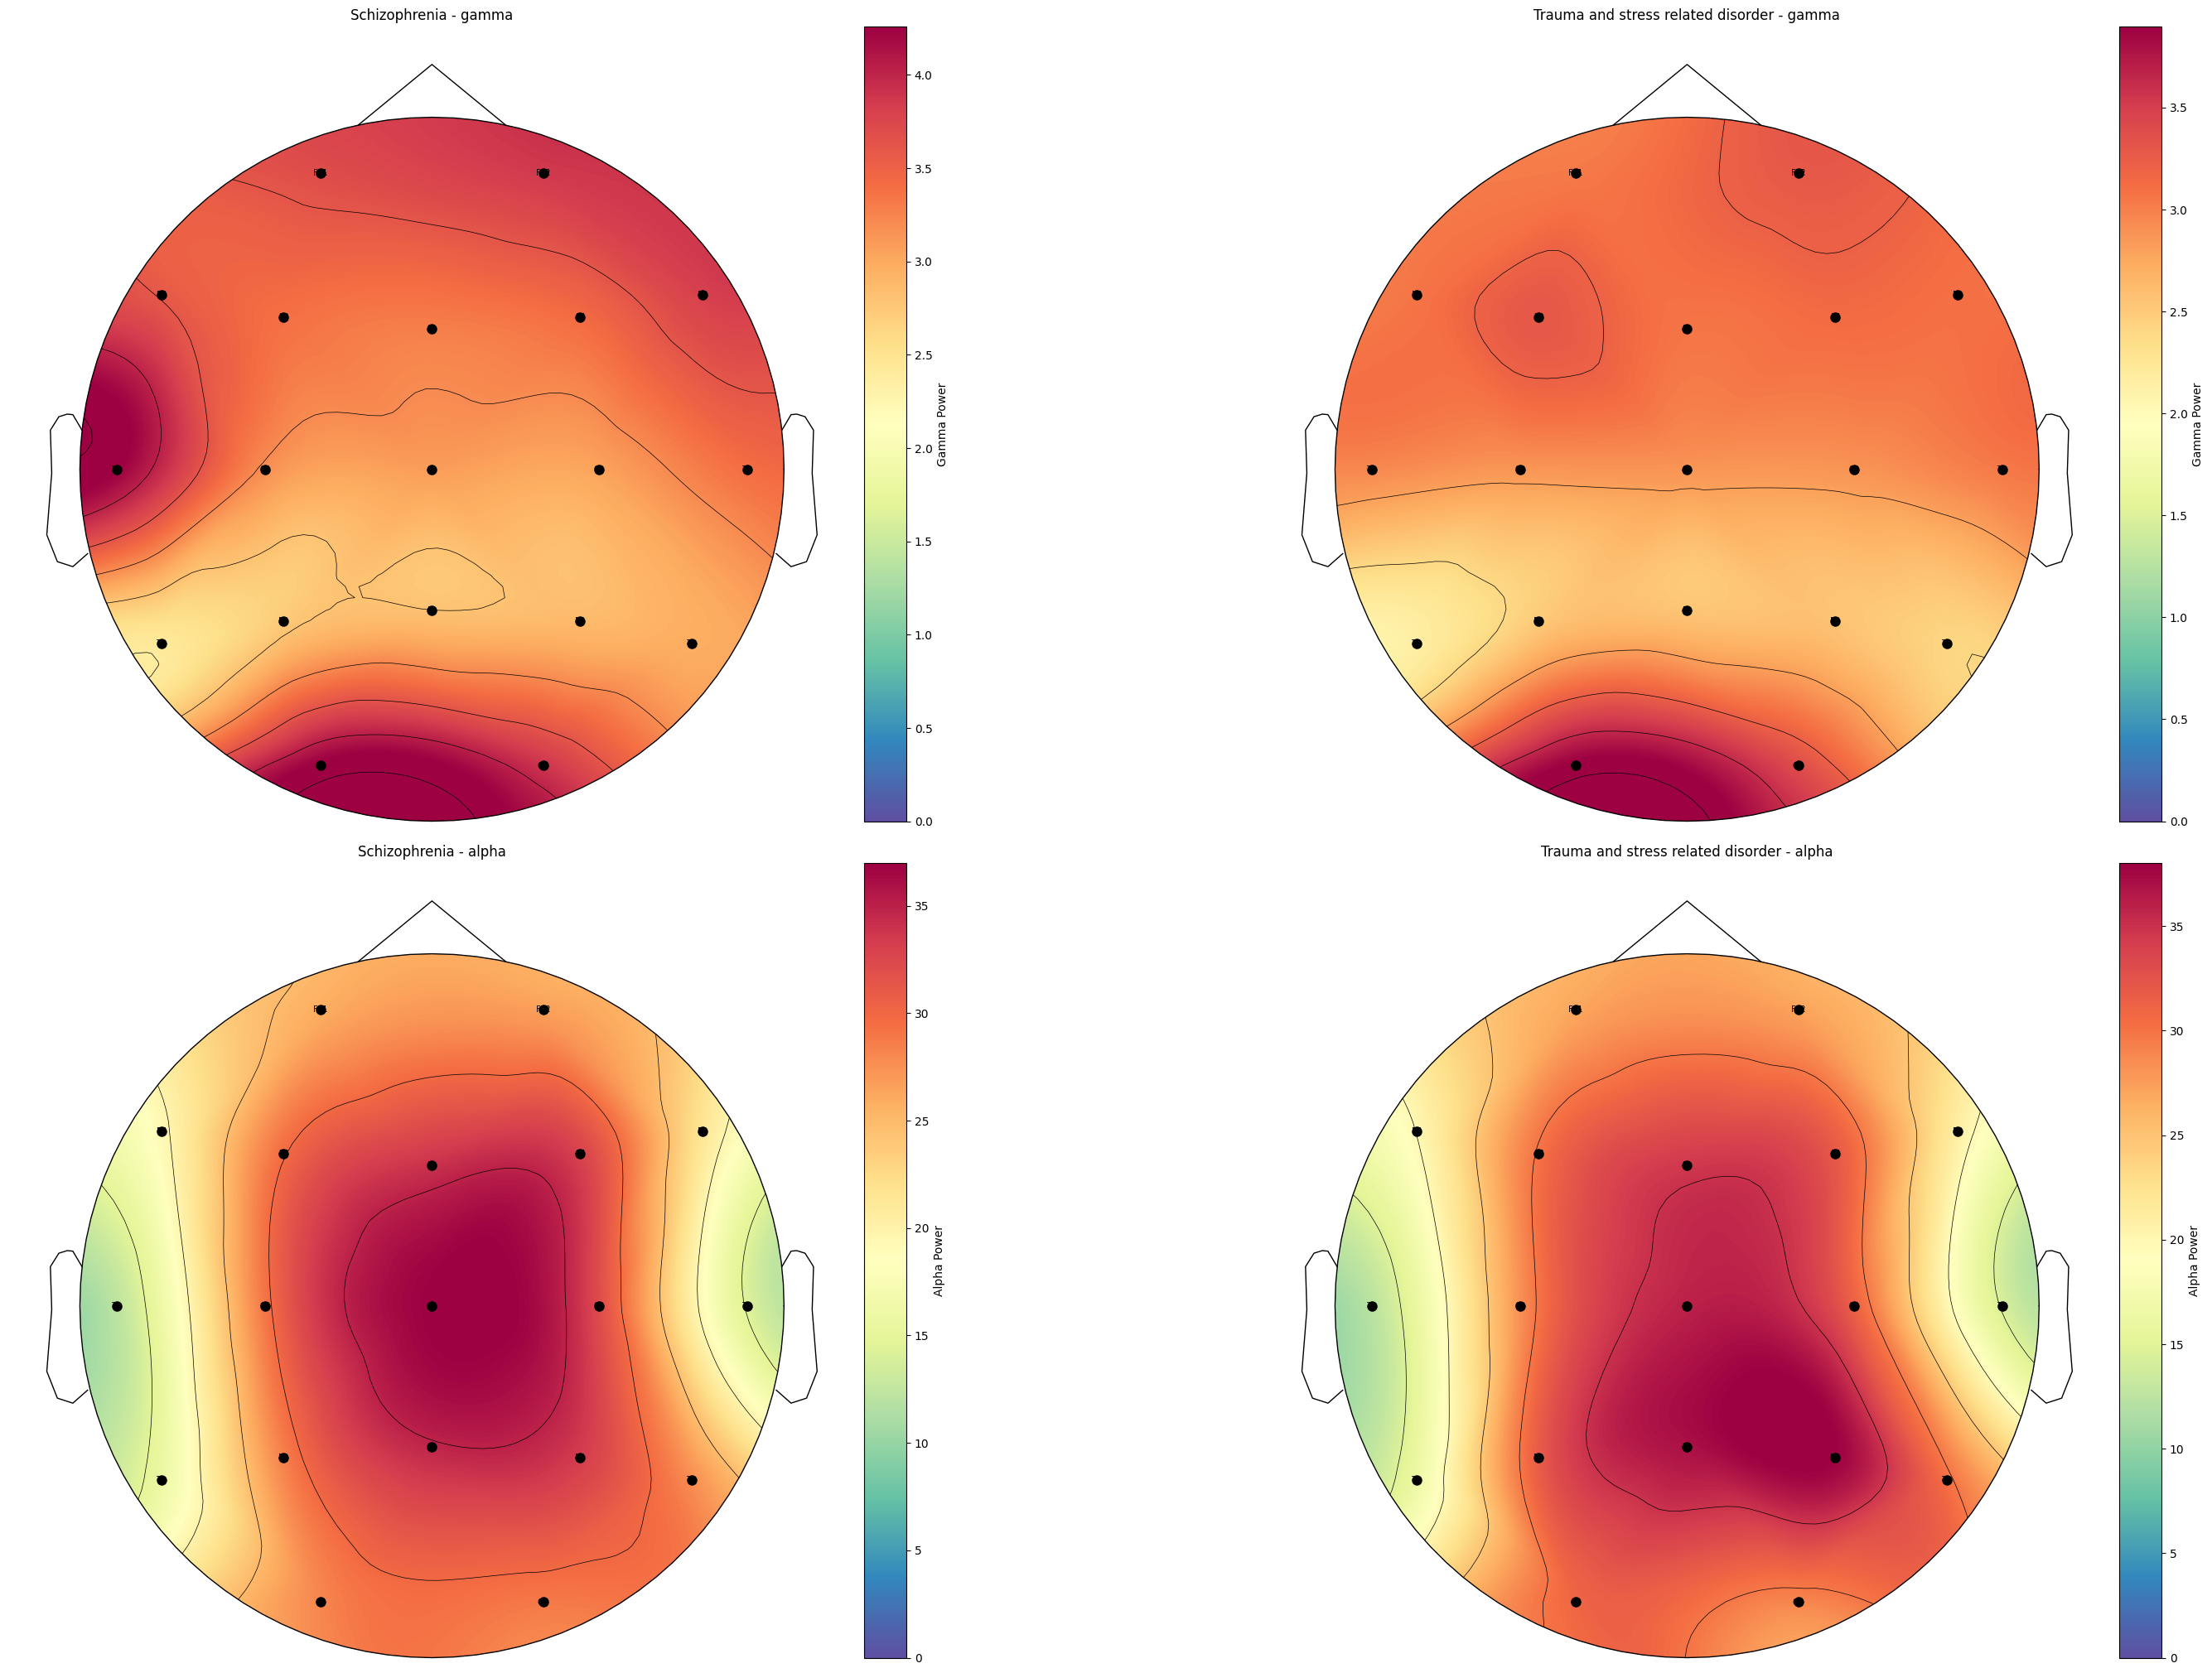

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd # Make sure pandas is imported
import numpy as np # Make sure numpy is imported
import mne # Make sure mne is imported

# Assuming df, main_mean, and channels are already defined from previous cells

# Redefine plot_eeg with cbar_label and cb_ax parameters
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r',
             marker=None, marker_style=None, vlim=None, cbar_label=None, cb_ax=None, **kwargs):
    """
    Function visualizes processed EEG data in a simple way. Based on mne.viz.plot_topomap.

    :param levels: numpy.array, shape (n_chan,)
        data values to plot.
    :param positions: numpy.array, shape (n_chan, 2)|instance of mne.Info
        Location information for the data points(/channels).
    :param axes: matplotlib.axes.Axes
        The axes to plot to.
    :param fig: matplotlib.figure.Figure
        The figure object (used for colorbar if cb_ax is None).
    :param ch_names: list | None
        List of channel names.
    :param cmap: matplotlib colormap | None
        Colormap to use.
    :param marker: numpy.array of bool, shape (n_channels,) | None
        Array indicating channel(s) to highlight.
    :param marker_style: dict | None
        Additional plotting parameters for plotting significant sensors.
    :param vlim: tuple of length 2 | 'joint' | None
        Lower and upper bounds of the colormap.
    :param cbar_label: str | None
        Label for the colorbar.
    :param cb_ax: matplotlib.axes.Axes | None
        Axes to draw the colorbar on. If None, a new axes is added to `fig`.
    :param kwargs:
        any other parameter used in mne.viz.plot_topomap
    :return im: matplotlib.image.AxesImage
        The interpolated data.
    :return cn: matplotlib.contour.ContourSet
        The fieldlines.
    """
    mask = marker if marker is not None else np.ones(levels.shape[0], dtype=bool)

    im, cm = mne.viz.plot_topomap(
        levels, positions, axes=axes, sensors=True, names=ch_names, mask=mask, mask_params=marker_style,
        cmap=cmap, outlines='head', contours=5, image_interp='cubic', show=False,
        sphere=None, res=64, extrapolate='head',
        border='mean',
        ch_type=None,
        vlim=vlim,
        **kwargs
    )

    if cb_ax is None:
        # Original colorbar placement logic (if not using make_axes_locatable)
        # This is not needed when cb_ax is provided by the caller using make_axes_locatable
        # cbar_ax = fig.add_axes([0.9, 0.1, 0.04, 0.9]) # Default hardcoded position
        # fig.colorbar(im, cax=cbar_ax, label=cbar_label)
        pass # Do nothing if cb_ax is None and we're not using the default method
    else:
        # Use the provided colorbar axes
        fig.colorbar(im, cax=cb_ax, label=cbar_label)

    return im, cm


fig = plt.figure(constrained_layout=True, figsize=(30, 20))

data_to_plot = [
    main_mean.loc['Schizophrenia', 'gamma'],
    main_mean.loc['Trauma and stress related disorder', 'gamma'],
    main_mean.loc['Schizophrenia', 'alpha'],
    main_mean.loc['Trauma and stress related disorder', 'alpha'],
]
titles = [
    'Schizophrenia - gamma',
    'Trauma and stress related disorder - gamma',
    'Schizophrenia - alpha',
    'Trauma and stress related disorder - alpha',
]
plot_map = [(0, 0), (0, 1), (1, 0), (1, 1)]
cbar_labels = ['Gamma Power', 'Gamma Power', 'Alpha Power', 'Alpha Power']

subfigs = fig.subfigures(nrows=2, ncols=2)

for i, data_series in enumerate(data_to_plot):
    row, col = plot_map[i]
    subfig = subfigs[row, col]

    # Create one axes for EEG and one for the colorbar
    ax = subfig.subplots()
    divider = make_axes_locatable(ax)
    cb_ax = divider.append_axes("right", size="5%", pad=0.1)

    title = titles[i]
    cbar_label = cbar_labels[i]

    data_series_reindexed = data_series.reindex(channels.index)

    plot_eeg(
        data_series_reindexed.to_numpy(),
        channels.to_numpy(),
        axes=ax,  # Changed from ax=ax to axes=ax to match function parameter name
        fig=fig,
        ch_names=channels.index.tolist(),
        cbar_label=cbar_label,
        cb_ax=cb_ax,
        vlim=(0, None),
        marker_style={'markersize': 8, 'markerfacecolor': 'black'}
        # Remove cb_pos, cb_width, cb_height as they are not used when cb_ax is provided
    )

    ax.set_title(title)

# Optional main title
# fig.suptitle("EEG Band Power by Disorder and Band", fontsize=20)
plt.show()


This image shows EEG topographic maps (also known as scalp plots) comparing average band power distributions across two disorders—Schizophrenia and Trauma and Stress Related Disorder (TSRD)—in two frequency bands: gamma and alpha.


🧠 Topomap Layout:




Gamma Band
Alpha Band




Schizophrenia
Top-left: Schizophrenia - gamma
Bottom-left: Schizophrenia - alpha


Trauma & Stress
Top-right: TSRD - gamma
Bottom-right: TSRD - alpha




📈 Interpretation by Region and Band:
🔺 Gamma Band (Top Row, 30–100 Hz)


Schizophrenia:


Elevated gamma power is seen posteriorly (especially around O1/O2, the occipital region).
Slight elevation in temporal regions (T3/T4) as well.
Suggests abnormal high-frequency activity in visual and perceptual processing areas.



Trauma & Stress:


Gamma power appears more uniform and frontal-central.
Lower power in posterior scalp areas compared to schizophrenia.
Suggests less hyperactivation in the occipital region than schizophrenia.




🔸 Alpha Band (Bottom Row, 8–13 Hz)


Both Conditions:


High alpha power is concentrated in central-parietal regions (around Cz, Pz, P3, P4).
This is typical of resting-state EEG in both healthy and clinical populations.



Schizophrenia:


More symmetrical and slightly stronger alpha in parietal and central areas.



Trauma & Stress:


Slightly more diffuse alpha distribution, extending posteriorly and laterally.
Possibly stronger in occipital regions (O1/O2), suggesting a different resting-state pattern.




🎯 Summary of Key Differences:



Feature
Schizophrenia
Trauma & Stress Related Disorder




Gamma Power
High in occipital, moderate in temporal
More frontal-central, less occipital


Alpha Power
Central-parietal focus, compact
Similar but more posterior spread




🧪 EEG Significance:

Gamma: Often reflects cortical excitation, attention, and perceptual integration. Abnormally elevated gamma is common in schizophrenia and linked to sensory processing abnormalities.
Alpha: Reflects resting-state relaxation and inhibitory control. Changes in alpha can signal cognitive or emotional dysregulation.

In [ ]:
def plot_eeg_dataset(dataset, channels, gwidth=2, gheight=1.5, wspace=0,
                     marker_style={'markersize': 2, 'markerfacecolor': 'black'},
                     band_ordered=None, conditions_ordered=None, band_labels=None,
                     condition_labels=None, **kwargs):
    """
    Visualisation of pre-processed EEG dataset.
    See example of usage on Kaggle (https://www.kaggle.com/code/lazygene/visualising-pre-processed-eeg-data)
    :param dataset: pandas.DataFrame
        Data set to visualise. See format of the dataset on Kaggle (url above).
    :param channels: pandas.DataFrame
        Channel (index) names and positions (columns: x and y).
    :param gwidth: float
        Width of single topology map.
    :param gheight: float
        Height of single topology map.
    :param wspace: float
        Space between subplots
    :param marker_style:
        marker_style: dict
        Additional plotting parameters for plotting significant sensors. Default (None) equals:
        dict(marker='o', markerfacecolor='black', markeredgecolor='k', linewidth=0, markersize=2)
    :param band_ordered: list | None
        List of EEG bands (e.g. delta, gamma, etc.), they must be one or more columns of dataset DataFrame.
        Provides a way to control the order (form top to bottom) of bands in the resulted complex figure.
        If None, all columns of dataset are used in orfer of columns.
    :param conditions_ordered: list | None
        List of conditions, they must be one or more level 0 indecies of dataset DataFrame.
        Provides a way to control the order (from left to right) of conditions in the resulted complex figure.
        If None, all unique 0 level indecies of dataset are used in order they are in the dataset.
    :param band_labels: list | None
        List of custom labels for EEG bands, it must be the same length as band_ordered.
        If None, column names of dataset DataFrame are used.
    :param condition_labels: list | None
        List of custom labels for conditions, it must be the same length as conditions_ordered.
        If None, level 0 index names of dataset DataFrame are used.
        Provides a way to add custom titles to columns of the resulted complex figure.
    :param kwargs:
        any other parameter used in mne.viz.plot_topomap, for example:
        vlim=None, cmap='Spectral_r', cbar_label=None, etc.
    :return:
        matplotlib.figure.Figure: The figure object.
        list: A list of matplotlib.axes.Axes objects for each topomap.
    """
    # Determine the order of bands and conditions
    bands = band_ordered if band_ordered is not None else dataset.columns.tolist()
    conditions = conditions_ordered if conditions_ordered is not None else dataset.index.get_level_values(0).unique().tolist()

    # Determine the labels for bands and conditions
    band_lbls = band_labels if band_labels is not None else bands
    condition_lbls = condition_labels if condition_labels is not None else conditions

    # Check that the number of labels matches the number of items
    if band_labels is not None and len(band_labels) != len(bands):
        raise ValueError("Length of band_labels must match length of band_ordered.")
    if condition_labels is not None and len(condition_labels) != len(conditions):
        raise ValueError("Length of condition_labels must match length of conditions_ordered.")

    # Get dimensions of the grid
    nrows = len(bands)
    ncols = len(conditions)

    # Create the figure and grid of axes
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * gwidth, nrows * gheight),
                             constrained_layout=False,  # Use subplots_adjust later
                             squeeze=False) # Ensure axes is always 2D

    # Adjust spacing
    plt.subplots_adjust(wspace=wspace)

    # Flatten axes array for easy iteration if needed, but keep it 2D for indexing
    # axes_flat = axes.flatten()

    # Iterate through bands and conditions to plot each topomap
    for i, band in enumerate(bands):
        for j, condition in enumerate(conditions):
            ax = axes[i, j] # Get the specific axes for this plot

            # Extract data for the current condition and band
            # Need to select the data for the current condition, then the column for the current band
            try:
                 # Ensure the dataset is multi-indexed with condition as level 0 and channel as level 1
                data_series = dataset.loc[condition, band]
            except KeyError:
                print(f"Warning: Data for condition '{condition}' and band '{band}' not found. Skipping plot.")
                ax.set_title(f"{condition} - {band}\n(Data not found)")
                ax.axis('off') # Turn off axis for missing data
                continue # Skip to the next iteration

            # Reindex the data series to match the channels DataFrame index
            # This is crucial for ensuring correct mapping of data to positions
            data_series_reindexed = data_series.reindex(channels.index)

            # Remove NaNs that might occur if a channel is in 'channels.index' but not in data_series
            # Or interpolate/handle them as needed for the topomap plotting.
            # For simplicity, let's drop NaNs for now, but be aware this changes the data shape
            # and might affect plot_topomap if not handled carefully. A better approach
            # might involve masking or imputation depending on your data characteristics.
            # Let's assume for now that reindexing with NaNs is acceptable for plot_topomap.
            # If plot_topomap requires non-NaNs for plotting points, you might need interpolation.

            # Ensure levels and positions match in length (after potential reindexing/dropping)
            # Assuming plot_topomap can handle NaNs or that reindexing is sufficient.
            # If not, you'd need more sophisticated NaN handling.
            plot_levels = data_series_reindexed.values
            plot_positions = channels.loc[data_series_reindexed.index].to_numpy()
            plot_ch_names = data_series_reindexed.index.tolist()


            # Call the plot_eeg function
            # Note: plot_eeg expects 'axes', 'fig', 'levels', 'positions', 'ch_names', etc.
            # It also handles the colorbar internally based on cb_pos, cb_width, cb_height
            # or if cb_ax is passed (which we are NOT using in this multi-plot setup
            # as we'll add a single colorbar per row/column later or rely on the function's internal one).

            # Let's adjust plot_eeg to handle colorbar placement within the subplot if desired,
            # or remove colorbar creation from plot_eeg and add it here for better control.
            # For a grid, adding a colorbar per plot is often cluttered. A shared colorbar
            # per row (for a band) or per column (for a condition) might be better.
            # For simplicity, let's modify plot_eeg to accept a cb_ax or not draw a colorbar
            # if a flag is set, and we will add colorbars externally if needed.

            # For this structure, let's have plot_eeg NOT add a colorbar. We'll manage colorbars externally.
            # Need to update the plot_eeg definition to allow this or add a flag.
            # Let's assume we modify plot_eeg to take a `draw_cbar=True/False` argument.
            # Or, modify it to always return the mappable object, and we create the colorbar here.

            # MODIFIED plot_eeg (assuming it now returns the mappable object `im`):
            # (Need to ensure the plot_eeg definition used in the context is updated to return `im` and NOT create a colorbar)
            # If you want colorbars per plot, you can use make_axes_locatable here.
            # If you want shared colorbars, that requires a different approach (e.g., creating a separate axes for the colorbar).

            # Let's modify the plot_eeg definition to return the mappable image and let THIS function handle colorbars.

            # Re-defining plot_eeg (assuming it's intended to be used like this in this context)
            # Or, let's stick to the current plot_eeg definition which draws a colorbar internally
            # at a hardcoded position relative to the FIGURE. This will be problematic for subplots.

            # Let's revise plot_eeg to accept a `cb_ax` argument OR fall back to its internal logic if cb_ax is None.
            # The last version of plot_eeg in your notebook already does this to some extent.

            # Call the plot_eeg function
            # We need a way to control the vlim for consistency across rows/columns.
            # Let's find the global min/max for each band across all conditions if vlim is None.
            if 'vlim' not in kwargs or kwargs['vlim'] is None:
                # Calculate vlim for the entire band across all conditions
                band_data = dataset.loc[:, band].values.flatten()
                vmin = band_data[~np.isnan(band_data)].min()
                vmax = band_data[~np.isnan(band_data)].max()
                current_vlim = (vmin, vmax)
            else:
                current_vlim = kwargs['vlim']


            # Create a colorbar axis using make_axes_locatable
            divider = make_axes_locatable(ax)
            # The position ('right', 'left', 'top', 'bottom') determines where the new axes is placed relative to the parent axes (ax)
            # size determines the width or height, and pad determines the space between them.
            cb_ax = divider.append_axes("right", size="5%", pad=0.1)


            im, cm = plot_eeg(
                levels=plot_levels,
                positions=plot_positions,
                axes=ax,        # Pass the current subplot axis
                fig=fig,        # Pass the main figure for colorbar placement
                ch_names=plot_ch_names, # Pass channel names for this subplot
                vlim=current_vlim, # Pass the determined vlim
                marker_style=marker_style, # Pass the marker style
                cbar_label=band_lbls[i], # Label colorbar by band name
                cb_ax=cb_ax,     # Pass the colorbar axes to plot_eeg
                **kwargs         # Pass any additional kwargs
            )

            # Set title for each subplot
            # You might want condition names on top and band names on the side
            if i == 0: # First row, add condition labels at the top
                ax.set_title(condition_lbls[j], fontsize=12) # Adjust fontsize as needed

            # Add band label to the y-axis or as a row title if possible
            if j == 0: # First column, try adding band labels
                 # This is a bit tricky with standard axes titles. You could use fig.supylabel
                 # or add text annotations near the axes. Let's add as part of the title for now
                 # or rely on the cbar label and column titles.
                 # Alternative: Use axes.text or ax.annotate for row labels outside the plot area.
                 pass # Rely on column titles and cbar labels for now


    # Add overall figure title (optional)
    # fig.suptitle('EEG Dataset Visualization', fontsize=16)

    # Adjust layout to prevent labels/titles overlapping (might need manual adjustment depending on aspect ratio)
    # constrained_layout handles spacing, but sometimes manual adjustment is better for complex grids.
    # If using constrained_layout=True in fig creation, you don't need this.
    # fig.tight_layout() # Only use if not using constrained_layout

    plt.show()

    return fig, axes # Return the figure and axes objects

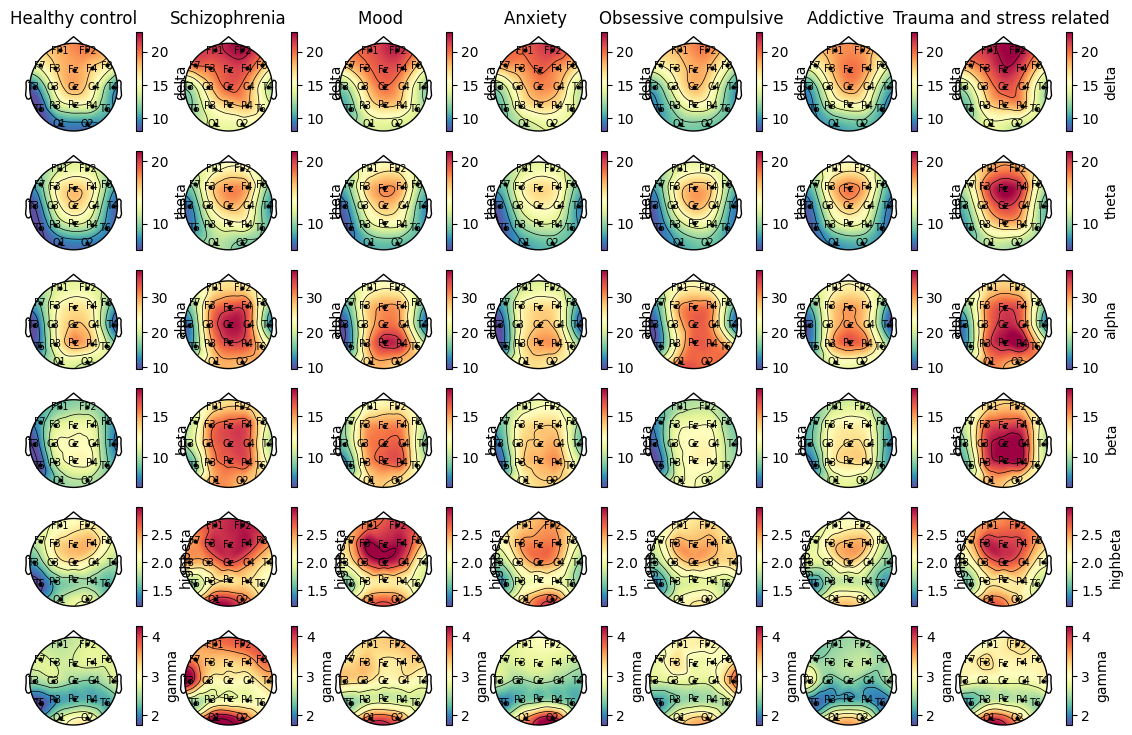

In [ ]:
# order conditions (main.disorder)
conds = ['Healthy control',
         'Schizophrenia',
         'Mood disorder',
         'Anxiety disorder',
         'Obsessive compulsive disorder',
         'Addictive disorder',
         'Trauma and stress related disorder']
conds_labs = [x.replace('disorder', '') for x in conds]
plot_eeg_dataset(main_mean, channels, conditions_ordered=conds, condition_labels=conds_labs)
plt.show()

This image is a grid of EEG topographic maps showing average band power distributions across seven groups (mental health disorders + healthy control) for six EEG frequency bands.


---

🧠 Layout Explanation:

Row (Y-axis)    EEG Frequency Band

Row 1   Delta (0.5–4 Hz)
Row 2   Theta (4–8 Hz)
Row 3   Alpha (8–13 Hz)
Row 4   Beta (13–30 Hz)
Row 5   High Beta (20–35 Hz)
Row 6   Gamma (30–100 Hz)


Column (X-axis) Group (main.disorder)

Column 1    Healthy Control
Column 2    Schizophrenia
Column 3    Mood Disorders
Column 4    Anxiety Disorders
Column 5    Obsessive Compulsive Disorder (OCD)
Column 6    Addictive Disorders
Column 7    Trauma and Stress-Related Disorders



---

🔎 Key Observations by Band:

🔵 Delta Band (Top Row)

Highest in schizophrenia and trauma, especially in frontal regions.

Low delta in healthy controls, which is expected during awake resting state.


🟣 Theta Band

Elevated theta in mood, anxiety, and trauma.

Central/parietal spread in most disorders — possibly linked to emotional dysregulation or attentional processing.


🔶 Alpha Band

Healthy controls show a central–parietal alpha peak, typical in resting-state.

Schizophrenia and mood disorders show higher alpha centrally and slightly anterior.

Addiction and trauma also show elevated alpha — possibly related to altered relaxation or inhibitory control.


🟠 Beta and High Beta Bands

Schizophrenia, mood, addictive, and trauma show increased beta/high-beta in frontal and central regions.

Could reflect increased cortical arousal or motor tension.

Healthy controls show more balanced and lower beta activity.


🔺 Gamma Band (Bottom Row)

Strong posterior gamma in schizophrenia and addictive disorders.

Healthy controls have the lowest gamma overall, consistent with less high-frequency cortical activation at rest.

Gamma hyperactivity in clinical groups may reflect cognitive disruption, hyperarousal, or noise in cortical circuits.



---

✅ Summary Table

Band    Common Finding in Disorders Implication

Delta   ↑ in schizophrenia, trauma (frontal)    Dysregulation in deep-brain/sleep-like activity
Theta   ↑ in mood, anxiety, trauma  Linked to cognitive/emotional load
Alpha   Altered in all disorders, often ↑ anteriorly    Resting brain inhibition or relaxation imbalance
Beta    ↑ in schizophrenia, addiction, trauma   Frontal overactivation, tension
High Beta   ↑ in trauma, addiction  Hyperarousal, stress markers
Gamma   ↑ in schizophrenia, addiction (occipital)   Cortical disinhibition, perceptual noise



---

🎯 Use Case

This figure helps:

Identify biomarkers in specific EEG bands for each disorder

Visualize spatial distribution of abnormalities across the scalp

Support ML-based EEG classification with interpretable features



---

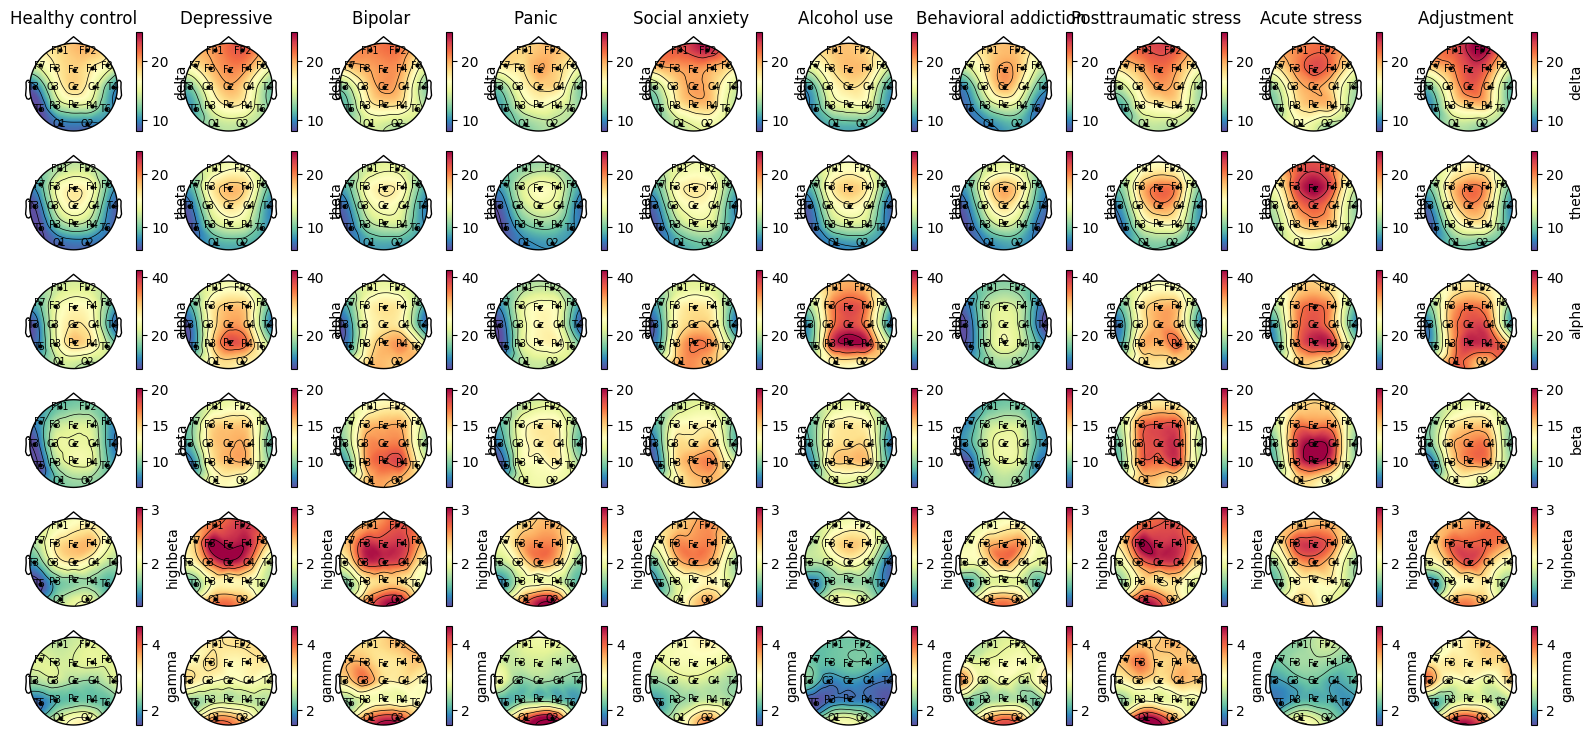

<Figure size 640x480 with 0 Axes>

In [ ]:
conds = ['Healthy control',
         'Depressive disorder',
         'Bipolar disorder',
         'Panic disorder',
         'Social anxiety disorder',
         'Alcohol use disorder',
         'Behavioral addiction disorder',
         'Posttraumatic stress disorder',
         'Acute stress disorder',
         'Adjustment disorder']
conds_labs = [x.replace('disorder', '') for x in conds]
plot_eeg_dataset(spec_mean, channels, conditions_ordered=conds, condition_labels=conds_labs)
plt.savefig('plot.png', bbox_inches='tight')

This image presents a grid of EEG topographic maps showing the mean scalp power distributions across different specific mental health conditions, including healthy controls, for six EEG frequency bands.


---

🧠 Layout Overview:

Rows (Y-Axis)	EEG Frequency Band

Row 1	Delta (0.5–4 Hz)
Row 2	Theta (4–8 Hz)
Row 3	Alpha (8–13 Hz)
Row 4	Beta (13–30 Hz)
Row 5	High Beta (20–35 Hz)
Row 6	Gamma (30–100 Hz)


Columns (X-Axis)	Specific Disorder

Column 1	Healthy Control
Column 2	Depressive Disorder
Column 3	Bipolar Disorder
Column 4	Panic Disorder
Column 5	Social Anxiety
Column 6	Alcohol Use
Column 7	Behavioral Addiction
Column 8	Post-Traumatic Stress Disorder (PTSD)
Column 9	Acute Stress
Column 10	Adjustment Disorder



---

🔍 Key Observations (Band-Wise)

🔵 Delta (Top Row)

Healthy controls show minimal delta—typical for awake state.

Elevated frontal delta in:

Depression

PTSD

Adjustment disorder

Suggests cognitive slowing or cortical dysregulation.




---

🟣 Theta (Row 2)

Moderate theta increase in:

Panic, Acute Stress, Depression

Central and posterior areas, possibly linked to emotional processing and attention.




---

🔶 Alpha (Row 3)

Healthy controls: typical central-parietal alpha peak

Alcohol use, Acute Stress, and Adjustment disorder show stronger or more frontal alpha, suggesting altered inhibition or idling.



---

🟠 Beta (Row 4)

Healthy controls show low, balanced beta.

Elevated frontal beta in:

Panic, Depression, Acute Stress

Linked to hyperarousal, anxiety, or mental tension.




---

🔺 High Beta (Row 5)

Strongest in Depression — especially frontal and central

Also elevated in Panic, Adjustment, and PTSD

Often associated with stress, arousal, or restlessness.



---

🔺 Gamma (Bottom Row)

Elevated posterior gamma in:

Depression, Bipolar, Adjustment


Suggests excessive cortical activity or dysfunctional excitation/inhibition balance



---

🎯 Summary Table

Band	Elevated In	Clinical Significance

Delta	Depression, PTSD, Adjustment	Cognitive slowing, cortical dysfunction
Theta	Panic, Acute Stress, Depression	Arousal/attention imbalance
Alpha	Alcohol, Acute Stress, Adjustment	Altered relaxation, inhibitory control
Beta	Depression, Panic, Acute Stress	Frontal overactivation, tension
High Beta	Depression (esp. frontal)	Stress, hypervigilance
Gamma	Depression, Bipolar, Adjustment	Excitation/inhibition imbalance, cortical noise



---

🧪 EEG Relevance

This figure provides a high-resolution view of how each specific disorder affects brain activity patterns by:

Highlighting band-specific abnormalities

Revealing spatial differences in activation (e.g., frontal vs posterior)

Supporting the discovery of EEG biomarkers for classification or diagnosis



---

In [ ]:
df.columns.get_level_values(0).unique()

Index(['main.disorder', 'specific.disorder', 'delta.FP1', 'delta.FP2',
       'delta.F7', 'delta.F3', 'delta.Fz', 'delta.F4', 'delta.F8', 'delta.T3',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=116)

In [ ]:
X = df.drop(columns=['main.disorder', 'specific.disorder'])  # EEG features
y1 = df['main.disorder']
y2 = df['specific.disorder']  # Target labels


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming df is already loaded and cleaned
X = df.drop(columns=['main.disorder', 'specific.disorder'])  # EEG features
y = df['main.disorder']  # You can swap with 'specific.disorder' if needed

# 1. Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. SMOTE for Class Balancing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:", Counter(y_train_resampled))

# 4. Model Training - Random Forest (you can change this to XGBoost or MLP)
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train_resampled, y_train_resampled)

# 5. Predictions and Evaluation
y_pred = clf.predict(X_test_scaled)

print("[Random Forest Results]")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


After SMOTE: Counter({'Healthy control': 213, 'Mood disorder': 213, 'Anxiety disorder': 213, 'Addictive disorder': 213, 'Trauma and stress related disorder': 213, 'Obsessive compulsive disorder': 213, 'Schizophrenia': 213})
[Random Forest Results]
Accuracy: 0.20634920634920634

Classification Report:
                                     precision    recall  f1-score   support

                Addictive disorder       0.24      0.32      0.28        37
                  Anxiety disorder       0.04      0.05      0.04        22
                   Healthy control       0.32      0.37      0.34        19
                     Mood disorder       0.38      0.26      0.31        53
     Obsessive compulsive disorder       0.00      0.00      0.00         9
                     Schizophrenia       0.00      0.00      0.00        23
Trauma and stress related disorder       0.21      0.19      0.20        26

                          accuracy                           0.21       189
           

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.2698

Classification Report:

                                    precision    recall  f1-score   support

                Addictive disorder       0.28      0.43      0.34        37
                  Anxiety disorder       0.10      0.05      0.06        22
                   Healthy control       0.44      0.21      0.29        19
                     Mood disorder       0.29      0.51      0.37        53
     Obsessive compulsive disorder       0.00      0.00      0.00         9
                     Schizophrenia       0.14      0.09      0.11        23
Trauma and stress related disorder       0.20      0.04      0.06        26

                          accuracy                           0.27       189
                         macro avg       0.21      0.19      0.18       189
                      weighted avg       0.24      0.27      0.23       189



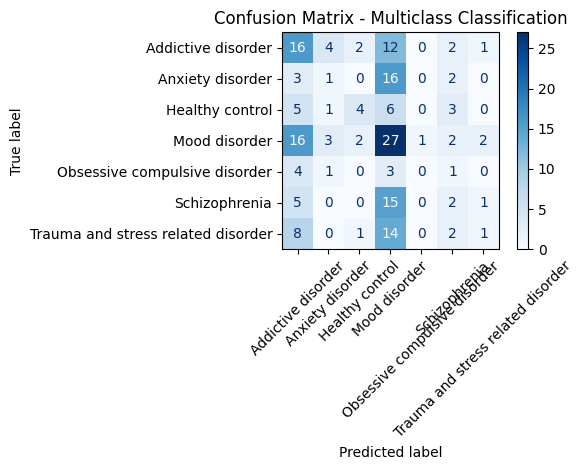

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Prepare features and target
X = df.drop(columns=['main.disorder', 'specific.disorder'])
y = df['main.disorder']

# 2. Split data into train/test sets with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Encode target labels as integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test) # Keep the encoded test labels

# 4. Initialize XGBoost for multiclass classification
clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',   # multiclass log loss
    max_depth=5,
    learning_rate=0.05,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 5. Train the model
clf.fit(X_train, y_train_enc)

# 6. Predict on test data (returns encoded labels)
y_pred_enc = clf.predict(X_test)
# y_pred = le.inverse_transform(y_pred_enc)  # We don't strictly need y_pred (decoded) for plotting if we use y_test_enc

# 7. Evaluate performance
# Use encoded labels for accuracy/report as they correspond to the model's output
accuracy = accuracy_score(y_test_enc, y_pred_enc)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n")
# Provide target_names to classification_report for readable output
print(classification_report(y_test_enc, y_pred_enc, target_names=le.classes_))

# 8. Plot confusion matrix
# Use the *encoded* test labels (y_test_enc) and the *encoded* predictions (y_pred_enc)
# Provide the original *string* class names as display_labels for readability on the plot.
ConfusionMatrixDisplay.from_predictions(
    y_test_enc, # True labels (encoded)
    y_pred_enc, # Predicted labels (encoded)
    display_labels=le.classes_, # Original string labels for axis ticks
    cmap='Blues',
)
plt.title("Confusion Matrix - Multiclass Classification")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:15:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Accuracy: 0.8677

Classification Report:

                 precision    recall  f1-score   support

       Disorder       0.92      0.93      0.93       170
Healthy control       0.33      0.32      0.32        19

       accuracy                           0.87       189
      macro avg       0.63      0.62      0.63       189
   weighted avg       0.86      0.87      0.87       189



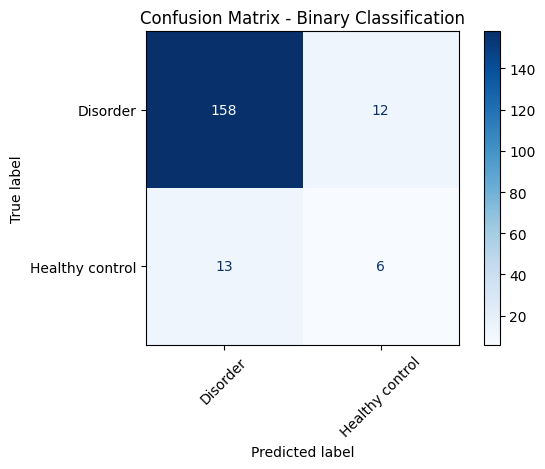

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Set up binary target
df['binary_target'] = df['main.disorder'].apply(lambda x: 'Healthy control' if x == 'Healthy control' else 'Disorder')

# Step 2: Feature matrix and target
X = df.drop(columns=['main.disorder', 'specific.disorder', 'binary_target'])
y = df['binary_target']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Encode target labels to numeric
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Step 5: SMOTE on training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_enc)

# Step 6: Train XGBoost classifier
# Setting enable_categorical=True might be beneficial if XGBoost handles categorical
# features directly, but for now, we rely on the numerical encoding.
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_resampled, y_resampled)

# Step 7: Predict on test set (returns encoded labels)
y_pred_enc = clf.predict(X_test)

# Step 8: Evaluate model using encoded labels for accuracy/report
# Note: classification_report and accuracy_score can handle numerical labels
# corresponding to the classes if the labels parameter is used (implicitly by LabelEncoder)
accuracy = accuracy_score(y_test_enc, y_pred_enc) # Use encoded labels for accuracy
print(f"\nAccuracy: {accuracy:.4f}\n")
# classification_report also works well with encoded labels and the LabelEncoder
print("Classification Report:\n")
print(classification_report(y_test_enc, y_pred_enc, target_names=le.classes_)) # Use encoded labels and provide target names

# Step 9: Plot confusion matrix - Use the *encoded* test labels,
# and provide the original *string* class names for display.
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test_enc,  # Pass the encoded test labels
    display_labels=le.classes_, # Pass the original string labels for display
    cmap='Blues'
)
plt.title("Confusion Matrix - Binary Classification")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()